In [1]:
# --------------------- EDA Rooftop Solar Potential of Johannesburg ----------------------

In [2]:
# --------------------- import necessary library ----------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# --------------------- Load datasets ----------------------
df = pd.read_csv("../original_datasets/johannesburg_rooftop_solar_potential.csv")

print("Initial Shape:", df.shape)
print("Columns:", df.columns.tolist())

Initial Shape: (414834, 18)
Columns: ['OBJECTID', 'uuid', 'City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Estimated_Installation_Efficiency', 'Unit_installation_price', 'Date_added', 'aoi', 'Roof_quality', 'solar_panels', 'Comment']


In [4]:
df.isna().sum()

OBJECTID                                  0
uuid                                      0
City                                      0
Surface_area                              0
Potential_installable_area                0
Peak_installable_capacity                 0
Energy_potential_per_year                 0
Assumed_building_type                     0
Estimated_tilt                            0
Estimated_building_height             31564
Estimated_capacity_factor              2949
Estimated_Installation_Efficiency         0
Unit_installation_price              414834
Date_added                           414834
aoi                                       0
Roof_quality                         414834
solar_panels                         414834
Comment                              414834
dtype: int64

In [5]:
#--------------------- Drop Unecessary columns --------------------------
df.drop(['aoi','OBJECTID','uuid', 'Comment','Unit_installation_price','Roof_quality','solar_panels','Date_added'] , axis=1, inplace=True)

In [6]:
# --------------------- columns after drop  ----------------------
print("Columns:", df.columns.tolist())
print(df.shape)

Columns: ['City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Estimated_Installation_Efficiency']
(414834, 10)


In [7]:
# ------------------ Missing value ----------------------
df.isna().sum()


City                                     0
Surface_area                             0
Potential_installable_area               0
Peak_installable_capacity                0
Energy_potential_per_year                0
Assumed_building_type                    0
Estimated_tilt                           0
Estimated_building_height            31564
Estimated_capacity_factor             2949
Estimated_Installation_Efficiency        0
dtype: int64

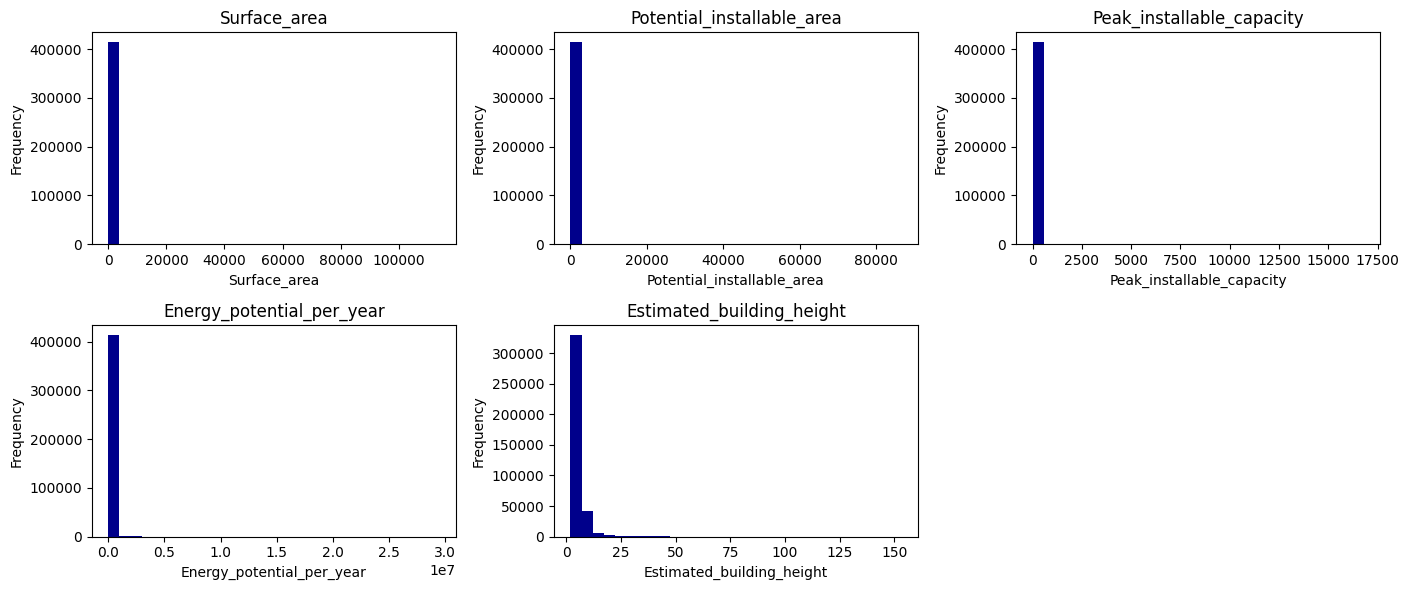

In [8]:
#-------------------- Distribution of necessary columns -------------------------------
cols = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year',
    'Estimated_building_height'
]

fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].plot(ax=axes[i], kind='hist', bins=30, color='darkblue', title=col)
    axes[i].set_xlabel(col)
    

# Hide the unused subplot (since you have 5 columns)
axes[-1].axis('off')

plt.tight_layout()
plt.show()

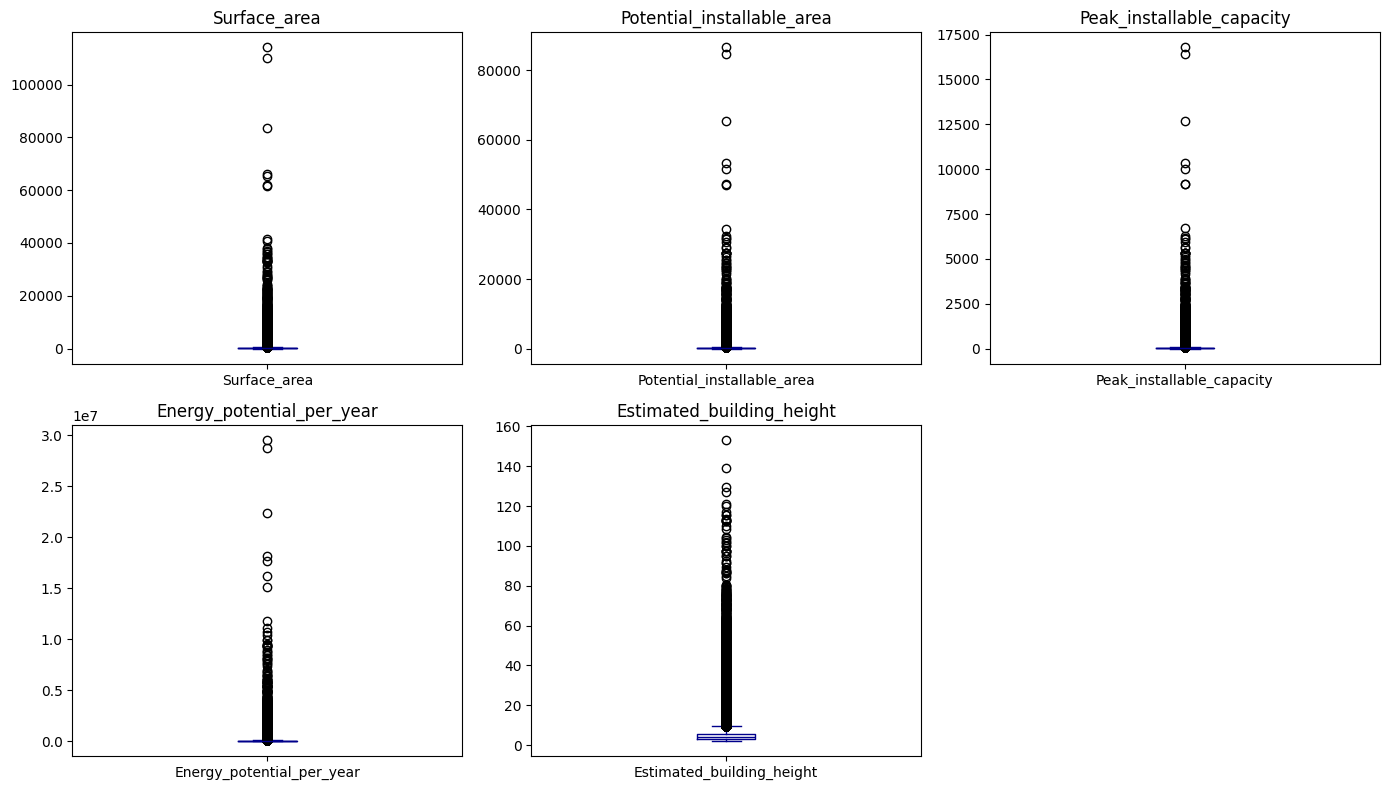

In [9]:
#-------------------- Boxplot of necessary columns to see outliers -------------------------------
cols = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year',
    'Estimated_building_height'
]

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].plot(ax=axes[i], kind='box', color='darkblue', title=col)
 
    

# Hide the unused subplot (since you have 5 columns)
axes[-1].axis('off')

plt.tight_layout()
plt.show()

In [10]:
(df == 0).sum()
#This means that eventhough there is surface_area but the potential installable area is 0. Then the surface couldn't be installed.

City                                      0
Surface_area                              0
Potential_installable_area             2949
Peak_installable_capacity              2949
Energy_potential_per_year              2949
Assumed_building_type                     0
Estimated_tilt                       101241
Estimated_building_height                 0
Estimated_capacity_factor                 0
Estimated_Installation_Efficiency      2949
dtype: int64

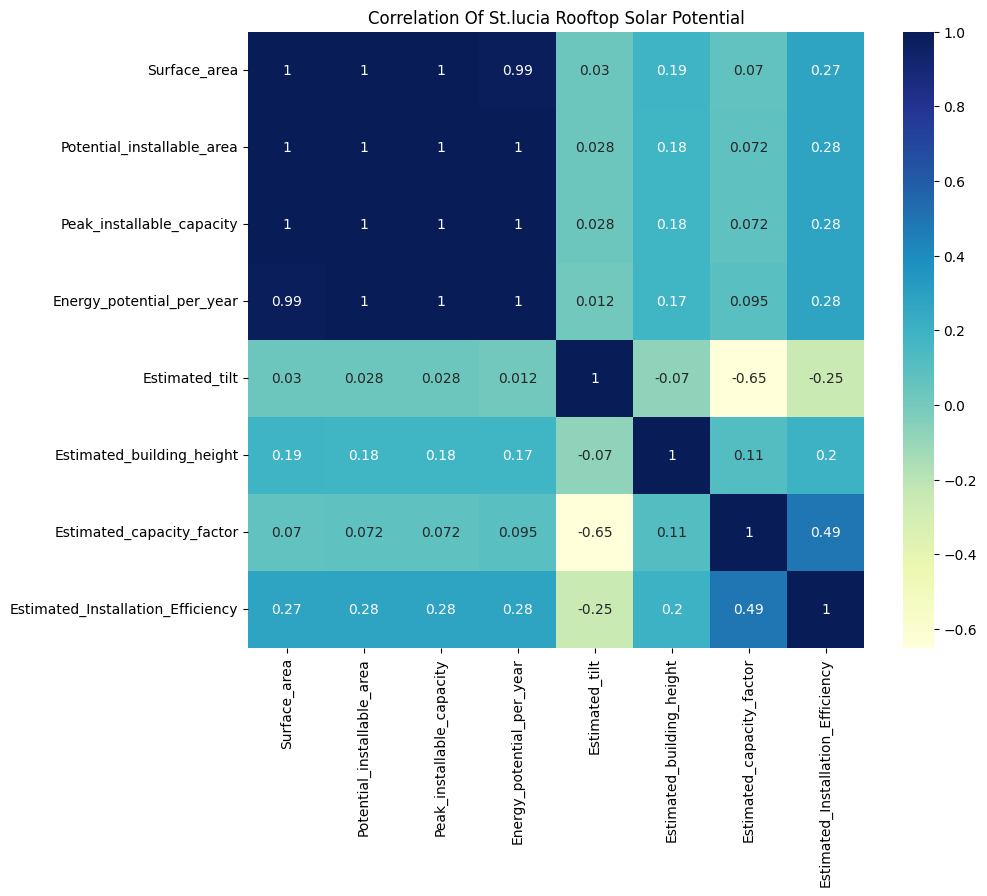

In [11]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Of St.lucia Rooftop Solar Potential")
plt.show()

In [ ]:
#Let's see why the value of Peak_installable_capacity and Energy_potential_per_year has correlation 1
df[df['Peak_installable_capacity'] == df['Energy_potential_per_year']]

,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Estimated_Installation_Efficiency
2,SouthAfrica,21.17,0.0,0.0,0.0,Single-family residential,0.00,NaN,NaN,0.0
300,SouthAfrica,12.88,0.0,0.0,0.0,Single-family residential,22.73,7.24,NaN,0.0
457,SouthAfrica,12.75,0.0,0.0,0.0,Single-family residential,0.00,4.86,NaN,0.0
907,SouthAfrica,11.17,0.0,0.0,0.0,Single-family residential,24.22,NaN,NaN,0.0
913,SouthAfrica,10.38,0.0,0.0,0.0,Single-family residential,0.00,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
414326,SouthAfrica,14.22,0.0,0.0,0.0,Single-family residential,23.26,6.11,NaN,0.0
414342,SouthAfrica,10.24,0.0,0.0,0.0,Single-family residential,0.00,3.40,NaN,0.0
414468,SouthAfrica,16.36,0.0,0.0,0.0,Single-family residential,20.95,2.19,NaN,0.0
414652,SouthAfrica,12.25,0.0,0.0,0.0,Single-family residential,0.00,NaN,NaN,0.0


In [13]:

df = df.loc[(df != 0).all(axis=1)]

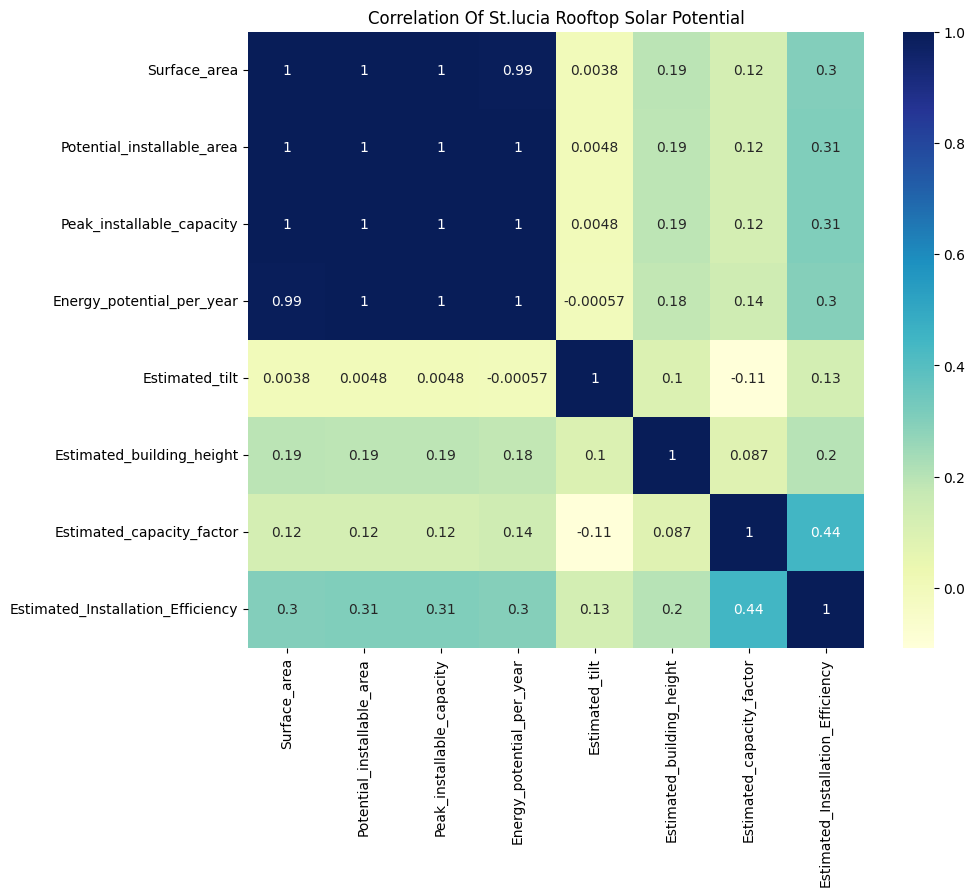

In [14]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Of St.lucia Rooftop Solar Potential")
plt.show()